In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale, StandardScaler
#use other methods

from utils_som import *

In [2]:
dataset = pd.read_csv('class_thyroid.csv')

In [3]:
dataset

,ResinaT3,Torixina,Triiodotironina,TSH,Diff_TSH,Classe
0,107.0,10.1,2.2,0.9,2.7,1.0
1,113.0,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,1.4,0.6,1.0
3,109.0,5.3,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,1.5,-0.1,1.0
...,...,...,...,...,...,...
210,118.0,6.5,1.3,1.7,11.5,3.0
211,139.0,4.2,0.7,4.3,6.3,3.0
212,103.0,5.1,1.4,1.2,5.0,3.0
213,97.0,4.7,1.1,2.1,12.6,3.0


In [4]:
category_color = {'1.0': 'darkgreen',
                  '2.0': 'limegreen',
                  '3.0': 'darkorange'}

thyroid_codes = {'1.0': 'normal',
 '2.0': 'hyper',
 '3.0': 'hypo'}

colors_dict = {c: category_color[str(dm)] for c, dm in zip(dataset.index.tolist(),
                                                      dataset.Classe)}


In [5]:
values = dataset.values[:,:-1]

In [6]:
values

array([[107. ,  10.1,   2.2,   0.9,   2.7],
       [113. ,   9.9,   3.1,   2. ,   5.9],
       [127. ,  12.9,   2.4,   1.4,   0.6],
       ...,
       [103. ,   5.1,   1.4,   1.2,   5. ],
       [ 97. ,   4.7,   1.1,   2.1,  12.6],
       [102. ,   5.3,   1.4,   1.3,   6.7]])

In [7]:
values.shape[0]

215

Suggested map for dimensionality reduction task

In [8]:
n = np.ceil(np.sqrt(5*np.sqrt(values.shape[0])))
print("{} x {} Map".format(n,n))

9.0 x 9.0 Map


# Criação do SOM

Para criar o SOM, basta iniciar o MiniSom() com os parâmetros desejados.

Os parâmetros obrigatórios são:

- x: Dimensão x do mapa 
- y: Dimensão y do mapa 
- input_len: Número de elementos do vetor 

Parâmetros opcionais (mas úteis para o trabalho):
- sigma: espalhamento da função da vizinhança. 
- learning_rate: taxa de aprendizado inicial.
- decay_function: função de decaimento. A função ** deve ** conter, em ordem, os seguintes parâmetros: taxa de aprendizado, iteração atual e número máximo de iterações.
- neighborhood_function: função da vizinhança para ponderação dos pesos. Valores possíveis: 'gaussian', 'mexican_hat', 'bubble', 'triangle'.
- topology: topologia da rede. Valores possíveis: 'rectangular', 'hexagonal'.

No arquivo desta aula prática, é mostrado o funcionamento básico do script. Além disso, para uma maior comodidade, também é desenvolvido um arquivo utils para o plot do Mapa de Kohonen. 


In [9]:
#Dimensão x
m = 20

#Dimensão y
n = 20

#Dimensão do vetor de entrada
input_len = values.shape[1]

#Taxa de aprendizado 
lr = 0.2

#Topologia 
#topology = 'hexagonal'
topology = 'rectangular'

X = minmax_scale(values)
# X = scale(values)
# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled


orderning_time = 1000000

#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Função para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr

som = MiniSom(m,n,input_len,learning_rate=lr,topology=topology,decay_function=decay_fcn)

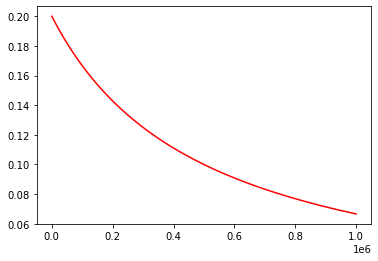

In [10]:
# 100 linearly spaced numbers
x = np.linspace(0,orderning_time,100)

y = lr/(1 + 2*x/orderning_time)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [11]:
som.pca_weights_init(values)

# Ordering phase

In [12]:
#som.train_batch(X, orderning_time, verbose=True)
som.train(X, orderning_time, verbose=True)


 [ 1000000 / 1000000 ] 100% - 0:00:00 left 
 quantization error: 0.010147564437431039
c:\Users\giova\OneDrive\Conhecimento\Doutorado\Codes\phd-puc\redesI\Clustering-SOM\minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [13]:
som.topographic_error(X) if topology == 'rectangular' else None

0.07441860465116279

In [14]:
print("lr = {}".format(lr))
print("som._learning_rate = {}".format(som._learning_rate))
print("som._sigma = {}".format(som._sigma))


lr = 0.2
som._learning_rate = 0.2
som._sigma = 1.0


# Fine Tuning

500 * número de processadores

In [15]:
def finetuning_decay(lr, actual_t, max_t):
    '''
    Função para decaimento da taxa de aprendizado

    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da iteração
    max_t - Tempo máximo da iteração

    ## OUTPUT:
    - taxa de aprendizado atualizada
    '''

    #new_lr = lr/(1 + 2*actual_t/max_t)
    
    return lr

In [16]:
som._decay_function = finetuning_decay

In [17]:
fine_tuning_time = 500 * m * n
#fine_tuning_time = 10

In [18]:
som._learning_rate = 0.01
som._sigma = 0.0000001
#som._sigma = 0
som._decay_function = finetuning_decay

som.train_batch(X, fine_tuning_time, verbose=True)
#som.train_random(X, fine_tuning_time, verbose=True)

 [ 200000 / 200000 ] 100% - 0:00:00 left 
 quantization error: 0.009015736626169073


In [19]:
som.topographic_error(X) if topology == 'rectangular' else None

0.09767441860465116

In [20]:
print("lr = {}".format(lr))
print("som._learning_rate = {}".format(som._learning_rate))
print("som._sigma = {}".format(som._sigma))

lr = 0.2
som._learning_rate = 0.01
som._sigma = 1e-07


In [21]:
#som.train(X, finetuning_time, verbose=True)

In [22]:
#som.train_random(X, 10000, orderning_time, verbose=True)

In [23]:
umatrix = som.distance_map()
weights = som.get_weights()

In [24]:
fname = dataset.columns[:-1]

# Gráficos 

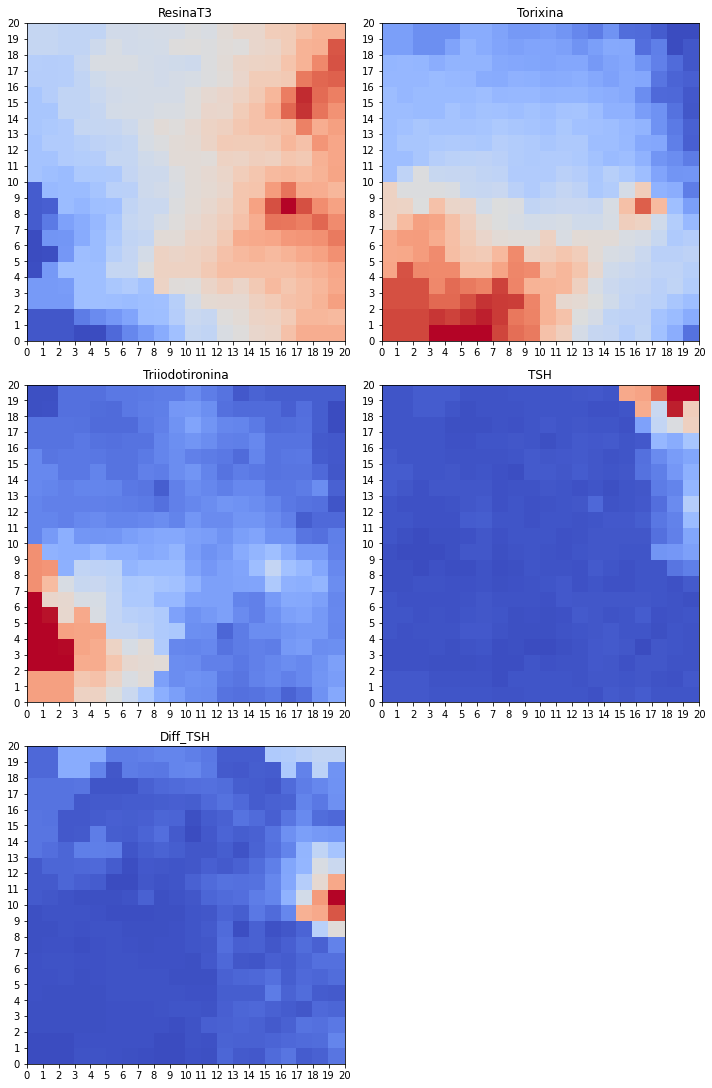

In [25]:
plot_map(som, 4, 2,feature_names = fname, size=(10,20),topology=topology, normalize_weights = True, um = False)

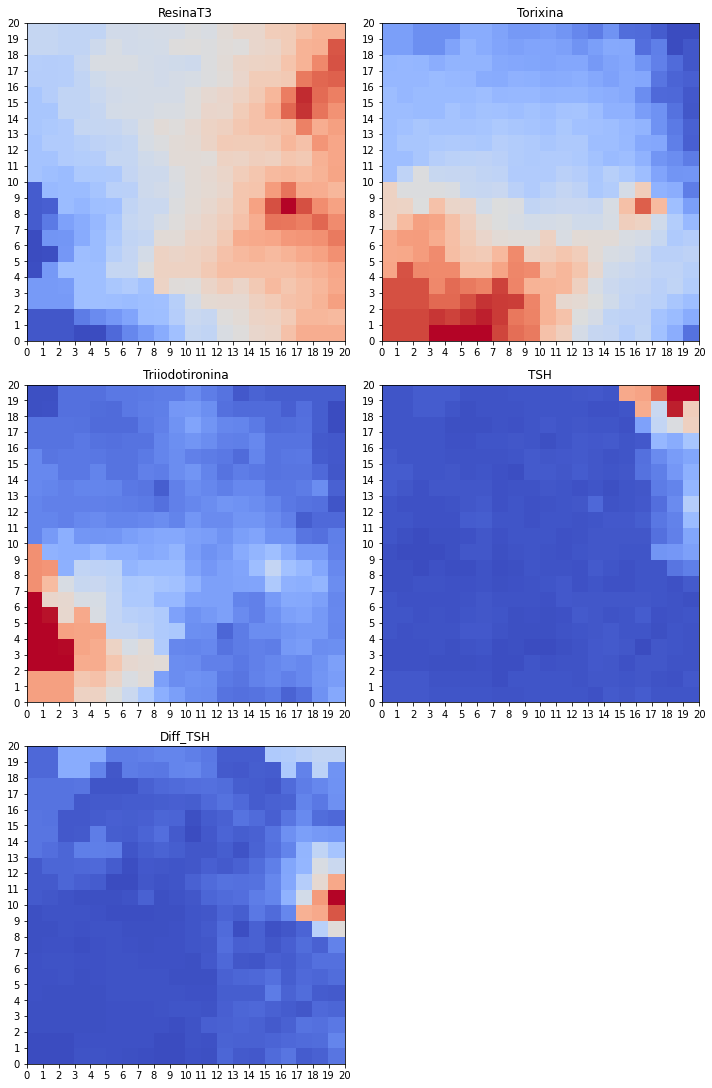

In [26]:
plot_map(som, 4, 2,feature_names = fname, size=(10,20),topology=topology, normalize_weights = True, um = False)

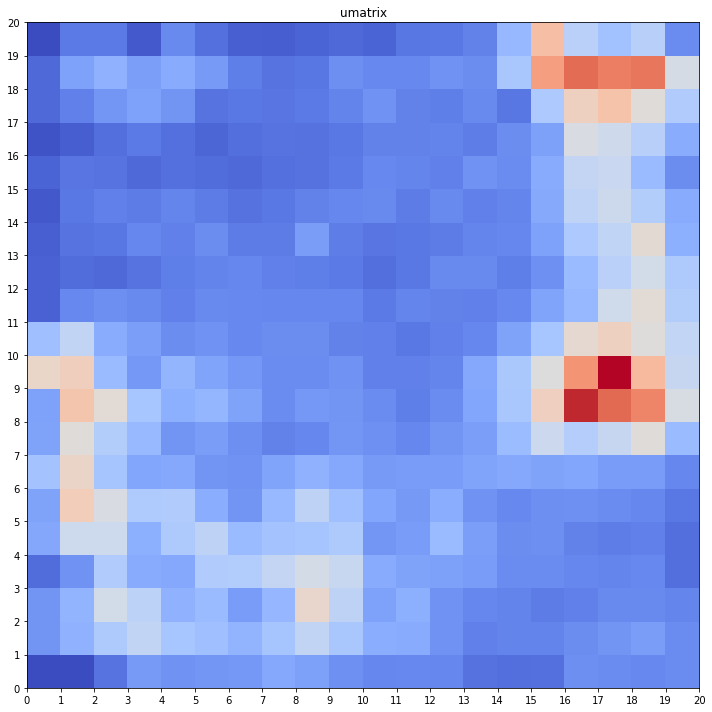

In [27]:
plot_umatrix(som,topology)

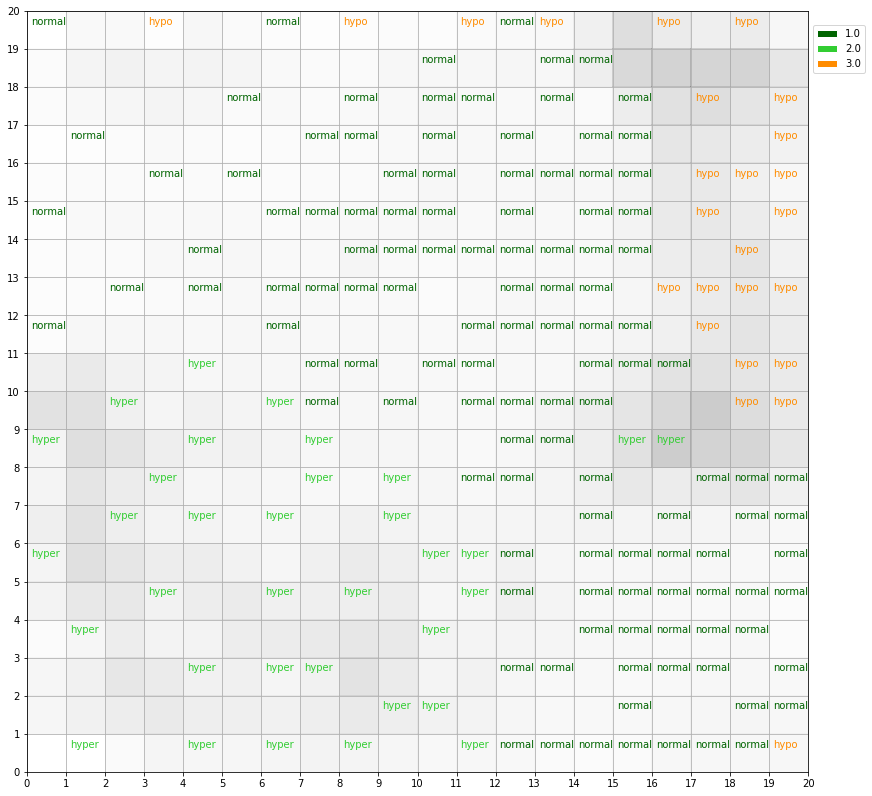

In [33]:
patient_map = som.labels_map(X, dataset.Classe)
    
plt.figure(figsize=(14, 14))
for p, patients in patient_map.items():
    patients = list(patients)
    #print(p, countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(patients):
        #print(i , c)
        off_set = (i+1)/len(patients) - 0.05
        plt.text(x, y+off_set, thyroid_codes[str(c)], color=category_color[str(c)], fontsize=10)
        #plt.text(x, y+off_set, c, color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(m+1))
plt.yticks(np.arange(m+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

In [34]:
W = som.get_weights()

In [37]:
W.shape

(20, 20, 5)

In [40]:
map = som.distance_map()
map.shape

(20, 20)